<a href="https://colab.research.google.com/github/akanksha-112/code/blob/main/imdb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Binary Classificaion of IMDB movies dataset


Loading the data

In [1]:
from keras.datasets import imdb

# Load the data, keeping only 10,000 of the most frequently occuring words
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

In [2]:
# Since we restricted ourselves to the top 10000 frequent words, no word index should exceed 10000
# we'll verify this below

# Here is a list of maximum indexes in every review --- we search the maximum index in this list of max indexes
print(type([max(sequence) for sequence in train_data]))

# Find the maximum of all max indexes
max([max(sequence) for sequence in train_data])

<class 'list'>


9999

In [3]:
# Let's quickly decode a review

# step 1: load the dictionary mappings from word to integer index
word_index = imdb.get_word_index()

# step 2: reverse word index to map integer indexes to their respective words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Step 3: decode the review, mapping integer indices to words
#
# indices are off by 3 because 0, 1, and 2 are reserverd indices for "padding", "Start of sequence" and "unknown"
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

Preparing the data

Vectorize input data

In [4]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))    # Creates an all zero matrix of shape (len(sequences),10K)
    for i,sequence in enumerate(sequences):
        results[i,sequence] = 1                        # Sets specific indices of results[i] to 1s
    return results

# Vectorize training Data
X_train = vectorize_sequences(train_data)

# Vectorize testing Data
X_test = vectorize_sequences(test_data)

In [5]:
X_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [6]:
X_train.shape

(25000, 10000)

Vectorize labels

In [7]:
y_train = np.asarray(train_labels).astype('float32')
y_test  = np.asarray(test_labels).astype('float32')

Model definition

In [8]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Compiling the model

In [9]:
from keras import optimizers
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss = losses.binary_crossentropy,
              metrics = [metrics.binary_accuracy])


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Setting up validation

In [10]:
# Input for Validation
X_val = X_train[:10000]
partial_X_train = X_train[10000:]

# Labels for validation
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [11]:
history = model.fit(partial_X_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(X_val, y_val))

Epoch 1/20
30/30 [==============================] - 5s 114ms/step - loss: 0.5276 - binary_accuracy: 0.7602 - val_loss: 0.3876 - val_binary_accuracy: 0.8738
Epoch 2/20
30/30 [==============================] - 2s 56ms/step - loss: 0.3103 - binary_accuracy: 0.9022 - val_loss: 0.3052 - val_binary_accuracy: 0.8888
Epoch 3/20
30/30 [==============================] - 2s 71ms/step - loss: 0.2256 - binary_accuracy: 0.9273 - val_loss: 0.2829 - val_binary_accuracy: 0.8895
Epoch 4/20
30/30 [==============================] - 3s 94ms/step - loss: 0.1806 - binary_accuracy: 0.9423 - val_loss: 0.2839 - val_binary_accuracy: 0.8851
Epoch 5/20
30/30 [==============================] - 3s 91ms/step - loss: 0.1430 - binary_accuracy: 0.9548 - val_loss: 0.2876 - val_binary_accuracy: 0.8865
Epoch 6/20
30/30 [==============================] - 3s 105ms/step - loss: 0.1173 - binary_accuracy: 0.9641 - val_loss: 0.3215 - val_binary_accuracy: 0.8777
Epoch 7/20
30/30 [==============================] - 3s 89ms/step - l

In [12]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

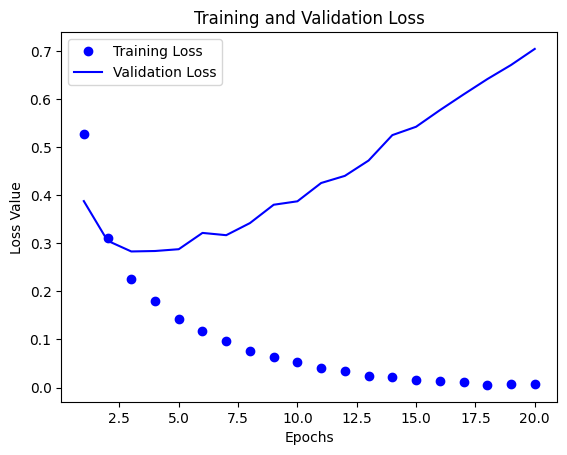

In [14]:
# Plotting losses
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label="Training Loss")
plt.plot(epochs, val_loss_values, 'b', label="Validation Loss")

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()

plt.show()

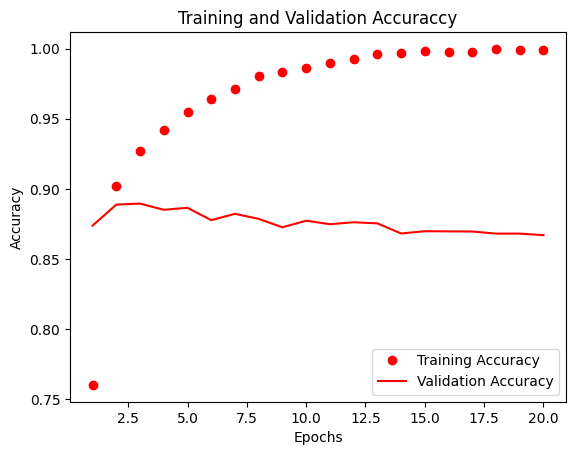

In [15]:
# Training and Validation Accuracy

acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, acc_values, 'ro', label="Training Accuracy")
plt.plot(epochs, val_acc_values, 'r', label="Validation Accuracy")

plt.title('Training and Validation Accuraccy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Retaining our model

In [16]:
model.fit(partial_X_train,
                   partial_y_train,
                   epochs=3,
                   batch_size=512,
                   validation_data=(X_val, y_val))

Epoch 1/3
30/30 [==============================] - 3s 89ms/step - loss: 0.0026 - binary_accuracy: 0.9999 - val_loss: 0.7295 - val_binary_accuracy: 0.8663
Epoch 2/3
30/30 [==============================] - 2s 53ms/step - loss: 0.0077 - binary_accuracy: 0.9980 - val_loss: 0.7661 - val_binary_accuracy: 0.8667
Epoch 3/3
30/30 [==============================] - 2s 77ms/step - loss: 0.0016 - binary_accuracy: 0.9999 - val_loss: 0.7894 - val_binary_accuracy: 0.8661


Model evaluation

In [17]:
# Making Predictions for testing data
np.set_printoptions(suppress=True)
result = model.predict(X_test)
result


782/782 [==============================] - 3s 4ms/step


array([[0.00161458],
       [0.9999996 ],
       [0.9366072 ],
       ...,
       [0.00029762],
       [0.00118746],
       [0.4800642 ]], dtype=float32)

In [18]:
y_pred = np.zeros(len(result))
for i, score in enumerate(result):
    y_pred[i] = 1 if score > 0.5 else 0

In [19]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_pred, y_test)

In [20]:
# Error
mae

0.15104